# Introduction to text classification

In this task, you will get a sense of using Python to do **text processing**. The dataset that we have is a public collection of SMS messages that have been collected for mobile phone spam reserach. <br>
The **goal** is: based on the text in the sms message to predict whether the message is a spam or not. We will illustrate basic text classification approchaches on [
SMS Spam Collection](https://archive.ics.uci.edu/ml/datasets/sms+spam+collection) data set. 
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.


## Dataset Information
We have the same set of data in two file formats: csv and txt file. Baesd on your preference, you can choose one file format to work with 😊. <br>
The dataset consists of a collection of different sms messages, with each line consisted of one label (either ham or spam) and the raw message. 

**See some examples below:** <br>
ham What you doing?how are you? <br>
ham Ok lar... Joking wif u oni... <br>
ham dun say so early hor... U c already then say... <br>
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*<br>
ham Siva is in hostel aha:-.<br>
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.<br>
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop<br>
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B<br>
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU<br>

Note: the messages are not chronologically sorted.

Dataset Citation:http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/
The SMS Spam Collection has been created by [Tiago A. Almeida](http://dcomp.sor.ufscar.br/talmeida/) and [José María Gómez Hidalgo](http://www.esp.uem.es/jmgomez).

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from zipfile import ZipFile

### Disabling MLFlow autologging

In [0]:
import mlflow
mlflow.autolog(disable=True)

### Reading dataset

In [0]:
df = pd.read_csv('./data/spam.csv', sep='\t')
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preparation of train and test data sets

Separate and rename target values.

In [0]:
data = df['Text']
target = df['Target'].replace('ham', 1).replace('spam', 0)
names = ['spam', 'ham']
print("\n", data[:5])
print("\n", target[:5])


 0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Text, dtype: object

 0    1
1    1
2    0
3    1
4    1
Name: Target, dtype: int64


Shuffle the data and split it to train and test parts.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
print('Train size: {}'.format(len(X_train)))
print('Test size: {}'.format(len(X_test)))

Train size: 4457
Test size: 1115


## Data preprocessing

Tokenize the texts. Experiment with various tokenizers from the [NLTK](http://www.nltk.org/api/nltk.tokenize.html) library.

In [0]:
from nltk.tokenize.casual import casual_tokenize

In [0]:
sms = data[4]
print(sms)

Nah I don't think he goes to usf, he lives around here though


In [0]:
tokenizer = lambda text: casual_tokenize(text, preserve_case=False)
print(tokenizer(sms))

['nah', 'i', "don't", 'think', 'he', 'goes', 'to', 'usf', ',', 'he', 'lives', 'around', 'here', 'though']


Convert tokens to their stems. Experiment with stemmers and lemmatizers from the [NLTK](http://www.nltk.org/api/nltk.stem.html) library.

In [0]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [0]:
stem_tokenizer = lambda text: [stemmer.stem(w) for w in tokenizer(text)]
print (stem_tokenizer(sms))

['nah', 'i', "don't", 'think', 'he', 'goe', 'to', 'usf', ',', 'he', 'live', 'around', 'here', 'though']


Fit a [vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) which converts texts to count vectors.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=stem_tokenizer, 
                             #token_pattern='(?u)\b\w\w+\b', 
                             stop_words="english",
                             strip_accents=None, 
                             lowercase=True, 
                             preprocessor=None, 
                             ngram_range=(1, 1), 
                             analyzer='word', 
                             max_df=1.0, 
                             min_df=1, 
                             max_features=5000, 
                             vocabulary=None,
                             )

In [0]:
vectorizer.fit(X_train)
print (vectorizer.transform([sms]))

/databricks/python/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/databricks/python/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'somet

Convert count vectors to TFIDF

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [0]:
tfidf_transformer.fit(vectorizer.transform(X_train))
print(tfidf_transformer.transform(vectorizer.transform([sms])))

  (0, 4482)	0.4772054392095842
  (0, 4169)	0.30429178354495645
  (0, 2685)	0.4772054392095842
  (0, 2459)	0.3791671679066397
  (0, 2032)	0.42421064935534597
  (0, 1545)	0.3185247445325957
  (0, 13)	0.16363379516537374


In [0]:
X_train.shape

Out[25]: (4457,)

## Classification

Train a classifier using the following models:
* [Logistic regression](http://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Gradient Boosted Trees](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (Experiment with different depths and number of trees)
* [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) (experiment with different kernels)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
clf_pipeline = Pipeline([('vec', vectorizer),
                         ('tfidf', tfidf_transformer),
                         #('lr', LogisticRegression()),
                         ('gbc', GradientBoostingClassifier(n_estimators=100, max_depth=4))
                         #('svm', svm.SVC(kernel='linear'))
                        ])
clf_pipeline.fit(X_train, y_train)

Out[26]: Pipeline(steps=[('vec',
                 CountVectorizer(max_features=5000, stop_words='english',
                                 tokenizer=<function <lambda> at 0x7fa2cbf1c280>)),
                ('tfidf', TfidfTransformer()),
                ('gbc', GradientBoostingClassifier(max_depth=4))])

## Evaluation

Compute common classification metrics and evaluate the models. Decide which model performs best on the given problem.

In [0]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = clf_pipeline.predict(X_test)

print ("Test accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
print()
print(metrics.classification_report(y_test, y_pred, digits=4))

Test accuracy: 0.96323

              precision    recall  f1-score   support

           0     0.9828    0.7451    0.8476       153
           1     0.9610    0.9979    0.9791       962

    accuracy                         0.9632      1115
   macro avg     0.9719    0.8715    0.9133      1115
weighted avg     0.9640    0.9632    0.9610      1115



[[114  39]
 [  2 960]]
Out[29]: <AxesSubplot:>

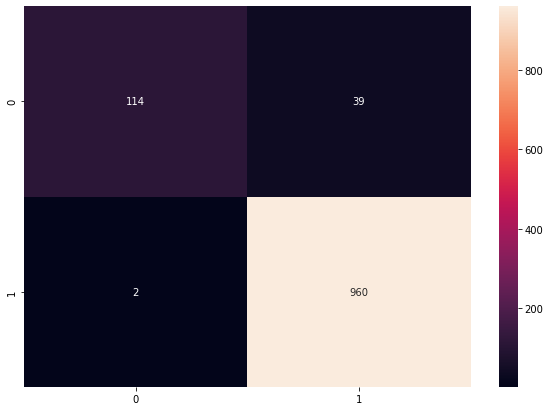

In [0]:
print(confusion_matrix(y_test, y_pred))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,  fmt='.0f')